### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd
import pandas_datareader as pdr
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
key=""
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [4]:
df.to_csv('APPLE.csv')

In [2]:
df=pd.read_csv('APPLE.csv')

In [3]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-09-11 00:00:00+00:00,114.21,114.21,111.760,111.79,49915473,26.381964,26.381964,25.816025,25.822955,199661892,0.0,1.0
1,AAPL,2015-09-14 00:00:00+00:00,115.31,116.89,114.860,116.58,58363431,26.636058,27.001031,26.532110,26.929422,233453724,0.0,1.0
2,AAPL,2015-09-15 00:00:00+00:00,116.28,116.53,114.420,115.93,43341155,26.860124,26.917872,26.430473,26.779275,173364620,0.0,1.0
3,AAPL,2015-09-16 00:00:00+00:00,116.41,116.54,115.440,116.25,37173489,26.890153,26.920182,26.666088,26.853194,148693956,0.0,1.0
4,AAPL,2015-09-17 00:00:00+00:00,113.92,116.49,113.715,115.66,64112641,26.314975,26.908633,26.267621,26.716907,256450564,0.0,1.0


In [4]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-09-01 00:00:00+00:00,134.18,134.80,130.53,132.76,152470142,134.18,134.80,130.53,132.76,152470142,0.0,1.0
1253,AAPL,2020-09-02 00:00:00+00:00,131.40,137.98,127.00,137.59,200118991,131.40,137.98,127.00,137.59,200118991,0.0,1.0
1254,AAPL,2020-09-03 00:00:00+00:00,120.88,128.84,120.50,126.91,257599640,120.88,128.84,120.50,126.91,257599640,0.0,1.0
1255,AAPL,2020-09-04 00:00:00+00:00,120.96,123.70,110.89,120.07,332607163,120.96,123.70,110.89,120.07,332607163,0.0,1.0
1256,AAPL,2020-09-08 00:00:00+00:00,112.82,118.99,112.68,113.95,231366563,112.82,118.99,112.68,113.95,231366563,0.0,1.0


In [5]:
df1=df.reset_index()['close']

In [6]:
df1

0       114.21
1       115.31
2       116.28
3       116.41
4       113.92
         ...  
1252    134.18
1253    131.40
1254    120.88
1255    120.96
1256    112.82
Name: close, Length: 1257, dtype: float64

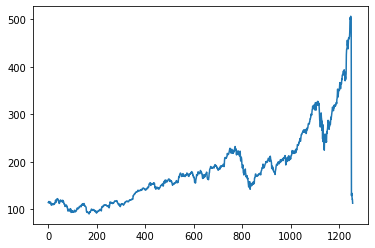

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [9]:
import numpy as np

In [10]:
df1

0       114.21
1       115.31
2       116.28
3       116.41
4       113.92
         ...  
1252    134.18
1253    131.40
1254    120.88
1255    120.96
1256    112.82
Name: close, Length: 1257, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.05741431]
 [0.06006013]
 [0.06239327]
 ...
 [0.07345761]
 [0.07365003]
 [0.05407096]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(817, 440)

In [15]:
train_data

array([[0.05741431],
       [0.06006013],
       [0.06239327],
       [0.06270595],
       [0.05671678],
       [0.05558629],
       [0.0598196 ],
       [0.05546603],
       [0.05767889],
       [0.05931449],
       [0.05861696],
       [0.05315695],
       [0.04502706],
       [0.04716777],
       [0.04627781],
       [0.04820204],
       [0.04916416],
       [0.05043897],
       [0.04916416],
       [0.04608539],
       [0.05238725],
       [0.0511365 ],
       [0.05159351],
       [0.04779314],
       [0.05176188],
       [0.04978954],
       [0.05144919],
       [0.05635598],
       [0.05633193],
       [0.06051714],
       [0.06912808],
       [0.05998797],
       [0.05823211],
       [0.06958509],
       [0.07261575],
       [0.0701383 ],
       [0.07417919],
       [0.07752255],
       [0.07615153],
       [0.07355382],
       [0.07389056],
       [0.07271197],
       [0.06357186],
       [0.06198437],
       [0.0610463 ],
       [0.05291642],
       [0.05733013],
       [0.056

In [16]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [17]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [39]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
warnings.filterwarnings('ignore')

In [40]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
warnings.filterwarnings('ignore')

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 339 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
716/716 [==============================] - 9s 13ms/sample - loss: 0.0101 - val_loss: 0.0462
Epoch 2/100
716/716 [==============================] - 5s 7ms/sample - loss: 0.0023 - val_loss: 0.0113
Epoch 3/100
716/716 [==============================] - 5s 7ms/sample - loss: 6.0871e-04 - val_loss: 0.0182
Epoch 4/100
716/716 [==============================] - 5s 6ms/sample - loss: 5.3362e-04 - val_loss: 0.0109
Epoch 5/100
716/716 [==============================] - 5s 7ms/sample - loss: 3.1179e-04 - val_loss: 0.0114
Epoch 6/100
716/716 [==============================] - 5s 7ms/sample - loss: 2.6818e-04 - val_loss: 0.0113
Epoch 7/100
716/716 [==============================] - 5s 7ms/sample - loss: 2.5896e-04 - val_loss: 0.0114
Epoch 8/100
716/716 [==============================] - 5s 7ms/sample - loss: 2.6352e-04 - val_loss: 0.0111
Epoch 9/100
716/716 [==============================] - 5s

716/716 [==============================] - 5s 7ms/sample - loss: 9.3600e-05 - val_loss: 0.0062
Epoch 75/100
716/716 [==============================] - 5s 8ms/sample - loss: 9.5371e-05 - val_loss: 0.0062
Epoch 76/100
716/716 [==============================] - 6s 8ms/sample - loss: 9.2557e-05 - val_loss: 0.0059
Epoch 77/100
716/716 [==============================] - 5s 7ms/sample - loss: 8.6276e-05 - val_loss: 0.0059
Epoch 78/100
716/716 [==============================] - 5s 8ms/sample - loss: 9.8915e-05 - val_loss: 0.0059
Epoch 79/100
716/716 [==============================] - 5s 7ms/sample - loss: 8.9656e-05 - val_loss: 0.0059
Epoch 80/100
716/716 [==============================] - 6s 8ms/sample - loss: 8.1992e-05 - val_loss: 0.0060
Epoch 81/100
716/716 [==============================] - 5s 7ms/sample - loss: 8.2088e-05 - val_loss: 0.0061
Epoch 82/100
716/716 [==============================] - 5s 8ms/sample - loss: 9.0332e-05 - val_loss: 0.0058
Epoch 83/100
716/716 [===================

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'1.13.1'

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

152.68349478884448

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

279.5516588593326

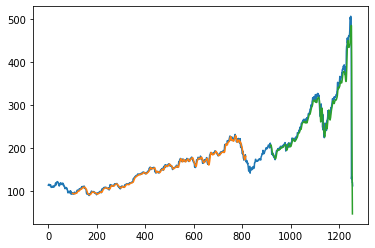

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()